In [1]:
pip install scipy matplotlib librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Pagina para descarga de audios: https://freesound.org/

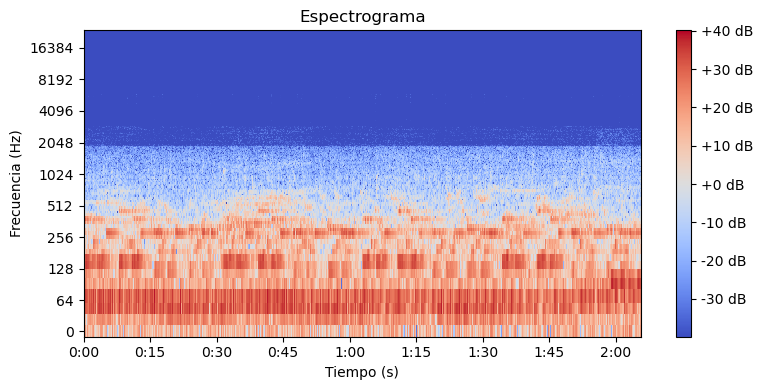

In [4]:
#Descarga de las librerías utiles
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import librosa.display

# Cargar el archivo de audio .wav, prealablemente descargado en freesound
archivo = '/Users/aliocha/Documents/IFTS18/Tecnica_del_habla/mysterioussong.wav'

# Leer el archivo de audio utilizando librosa
audio_data, sample_rate = librosa.load(archivo, sr=None)

# Calcular el espectrograma (STFT - Short Time Fourier Transform)
stft = librosa.stft(audio_data)
spectrogram = librosa.amplitude_to_db(np.abs(stft))

# Graficar el espectrograma
plt.figure(figsize=(8, 4))
librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='log')#, cmap='inferno' -> podemos poner"hot", "cool", "magma", etc... es un estilo de colores de gráfico
plt.colorbar(format='%+2.0f dB')
plt.title('Espectrograma')
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.tight_layout()
plt.show()


In [5]:
pip install sounddevice scipy numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


Grabando...
Grabación finalizada.


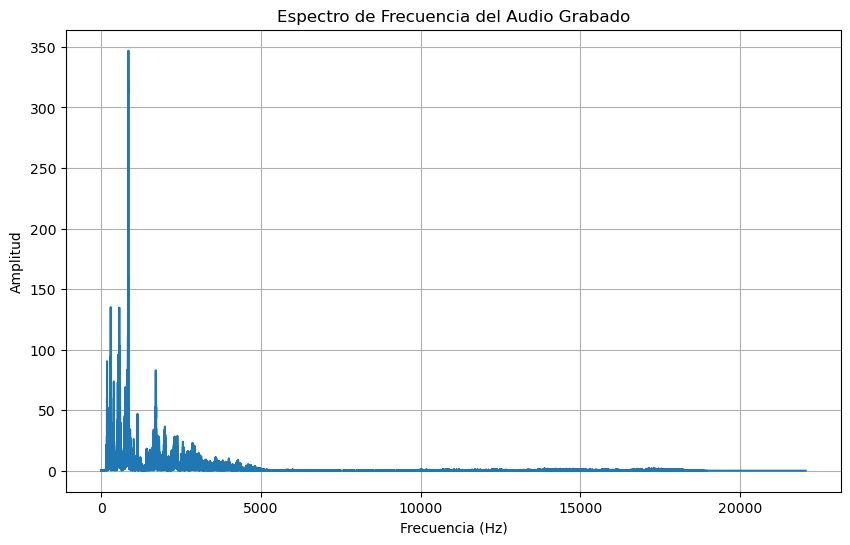

In [7]:
import sounddevice as sd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Parámetros de la grabación
duration = 5  # Duración de la grabación en segundos
sample_rate = 44100  # Frecuencia de muestreo (Hz)

# Función para grabar el audio
print("Grabando...")

audio_data = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=1, dtype='float64')
sd.wait()  # Esperar hasta que termine la grabación

print("Grabación finalizada.")

# La señal grabada es un arreglo 2D, así que la convertimos en 1D
audio_data = audio_data.flatten()

# Cálculo de la FFT (Transformada de Fourier)
N = len(audio_data)
yf = fft(audio_data)
xf = fftfreq(N, 1 / sample_rate)

# Filtrar sólo la mitad positiva del espectro
xf = xf[:N//2]
yf = np.abs(yf[:N//2])

# Graficar el espectro
plt.figure(figsize=(10, 6))
plt.plot(xf, yf)
plt.title("Espectro de Frecuencia del Audio Grabado")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()
